In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/archive (6).zip"
extract_path = "/content/unemployment_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


['Unemployment in India.csv', 'Unemployment_Rate_upto_11_2020.csv']

In [ ]:
# Core libraries for data analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use("seaborn-v0_8")


In [ ]:
# Load datasets
df_india = pd.read_csv("/content/unemployment_data/Unemployment in India.csv")
df_rate = pd.read_csv("/content/unemployment_data/Unemployment_Rate_upto_11_2020.csv")


In [ ]:
df_india.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df_rate.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df_india.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df_rate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df_india.isnull().sum()


,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
df_rate.isnull().sum()


,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [ ]:
# Clean column names (remove extra spaces)
df_india.columns = df_india.columns.str.strip()
df_rate.columns = df_rate.columns.str.strip()


In [ ]:
# Drop rows with missing values
df_india = df_india.dropna()


In [ ]:
df_india.isnull().sum()


,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [ ]:
#Convert Date column to datetime
df_india['Date'] = pd.to_datetime(df_india['Date'])
df_rate['Date'] = pd.to_datetime(df_rate['Date'])


/tmp/ipython-input-958223919.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_india['Date'] = pd.to_datetime(df_india['Date'])
/tmp/ipython-input-958223919.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_rate['Date'] = pd.to_datetime(df_rate['Date'])


In [ ]:
df_india.info()


<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [ ]:
df_rate = df_rate.drop(columns=['Region.1'])


Unemployment Trend Over Time in India

In [ ]:
# Group by Date and calculate average unemployment rate
india_trend = df_india.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()


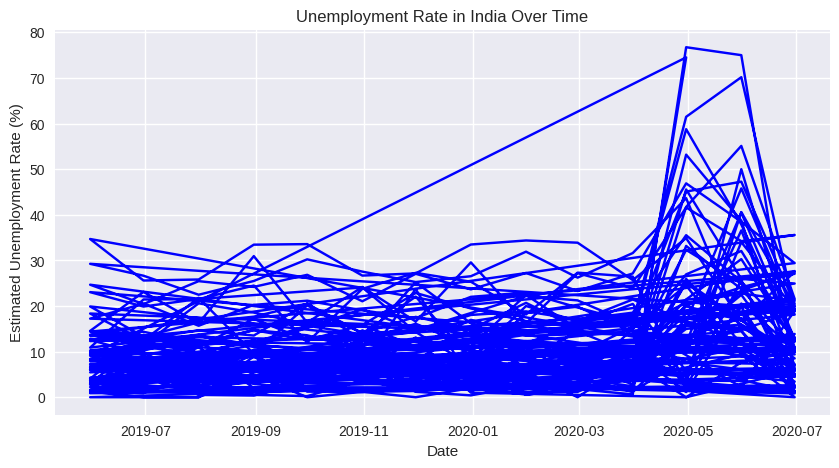

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(
    df_india['Date'],
    df_india['Estimated Unemployment Rate (%)'],
    color='blue'
)

plt.title("Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.show()


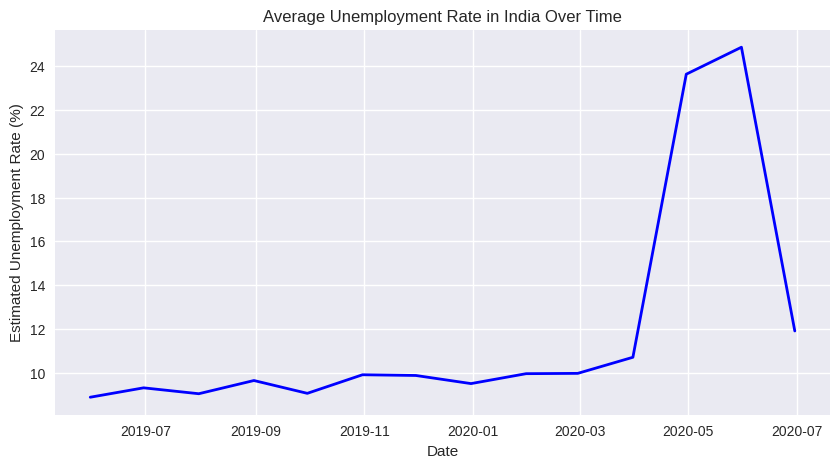

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(
    india_trend['Date'],
    india_trend['Estimated Unemployment Rate (%)'],
    color='blue',
    linewidth=2
)

plt.title("Average Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.show()


Average unemployment by region

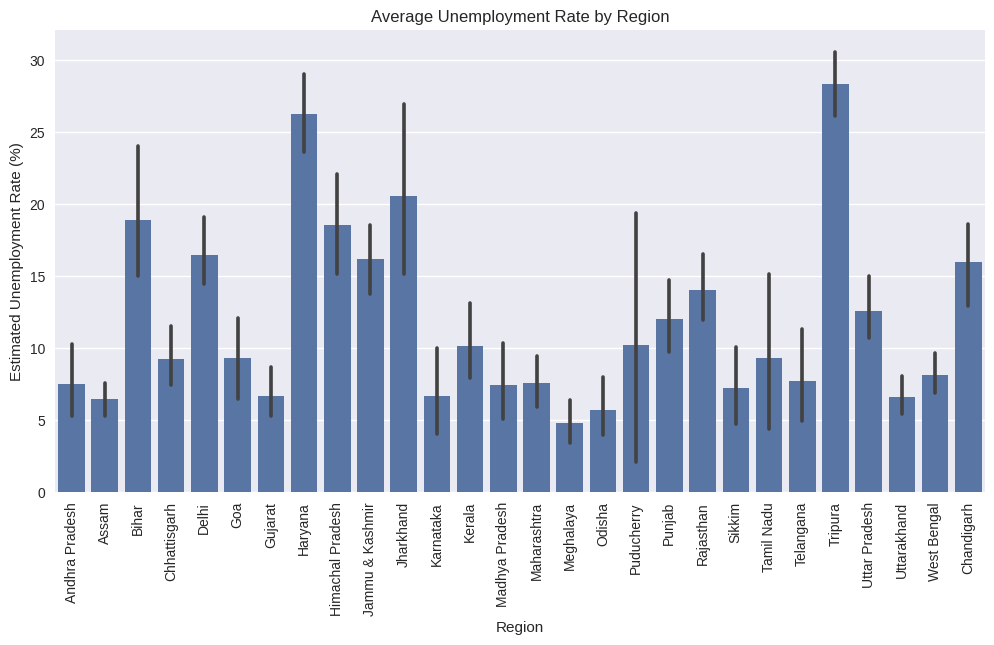

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(
    x='Region',
    y='Estimated Unemployment Rate (%)',
    data=df_india
)

plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by Region")
plt.show()


Split data into pre-COVID and during-COVID

In [ ]:
covid_start = "2020-03-01"

before_covid = df_india[df_india['Date'] < covid_start]
during_covid = df_india[df_india['Date'] >= covid_start]


In [ ]:
# Average unemployment rate before COVID
before_covid_trend = (
    before_covid
    .groupby('Date')['Estimated Unemployment Rate (%)']
    .mean()
    .reset_index()
)

# Average unemployment rate during COVID
during_covid_trend = (
    during_covid
    .groupby('Date')['Estimated Unemployment Rate (%)']
    .mean()
    .reset_index()
)


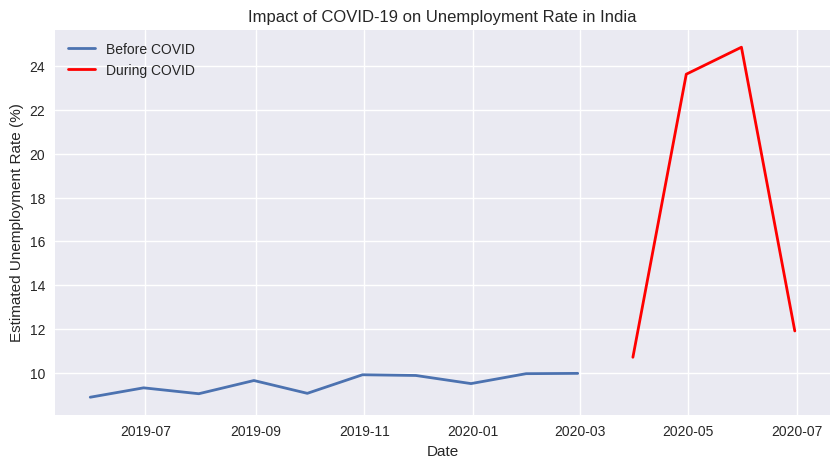

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(
    before_covid_trend['Date'],
    before_covid_trend['Estimated Unemployment Rate (%)'],
    label="Before COVID",
    linewidth=2
)

plt.plot(
    during_covid_trend['Date'],
    during_covid_trend['Estimated Unemployment Rate (%)'],
    label="During COVID",
    color='red',
    linewidth=2
)

plt.legend()
plt.title("Impact of COVID-19 on Unemployment Rate in India")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.show()


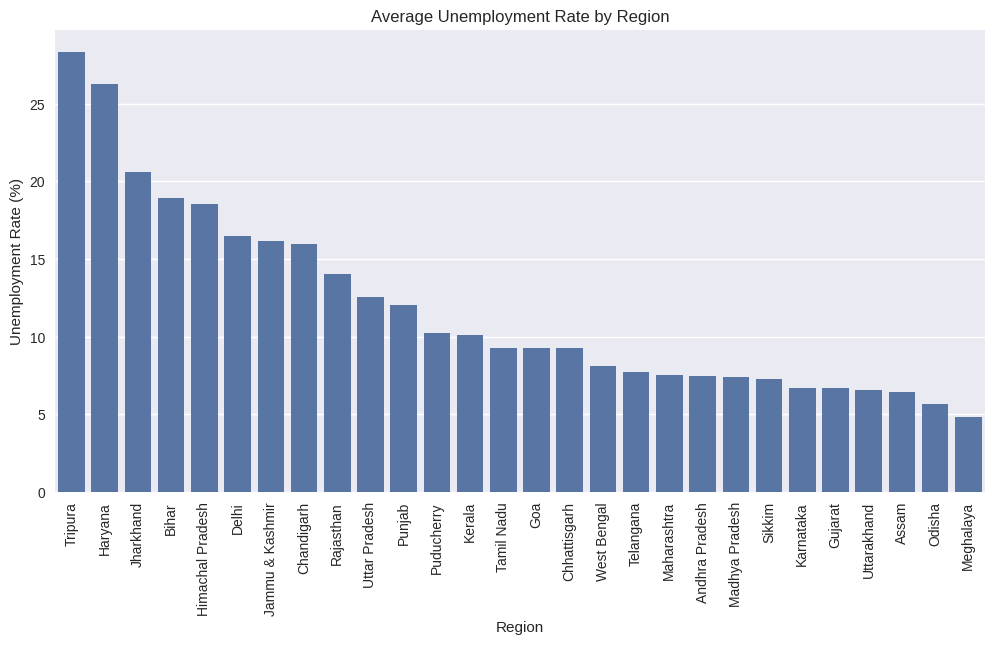

In [ ]:
# Average unemployment rate by region
region_avg = (
    df_india
    .groupby('Region')['Estimated Unemployment Rate (%)']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=region_avg,
    x='Region',
    y='Estimated Unemployment Rate (%)'
)

plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()


Urban vs Rural Analysis

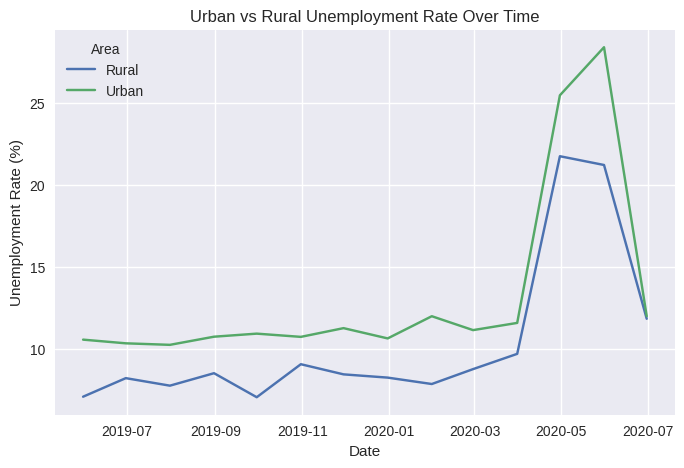

In [ ]:
# Average unemployment rate by Date and Area (Urban/Rural)
area_trend = (
    df_india
    .groupby(['Date', 'Area'])['Estimated Unemployment Rate (%)']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))

sns.lineplot(
    data=area_trend,
    x='Date',
    y='Estimated Unemployment Rate (%)',
    hue='Area'
)

plt.title("Urban vs Rural Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


##Urban vs Rural Analysis

The comparison shows that urban areas experienced sharper increases in unemployment during the COVID-19 period, while rural areas showed relatively more stability, indicating differing economic resilience.

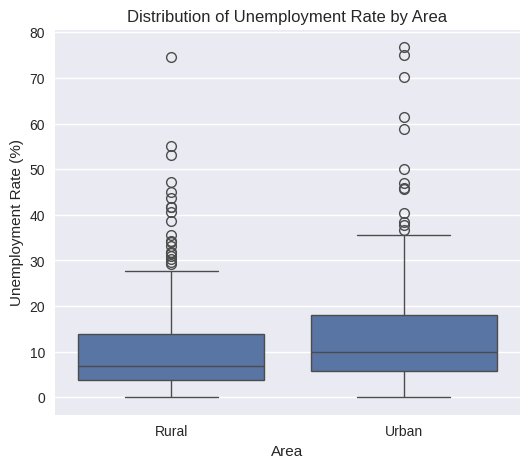

In [ ]:
#BOX PLOT: Unemployment Distribution by Area
plt.figure(figsize=(6,5))

sns.boxplot(
    data=df_india,
    x='Area',
    y='Estimated Unemployment Rate (%)'
)

plt.title("Distribution of Unemployment Rate by Area")
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.show()
